# DSCI 503 – Project 03
### Matt Snyder

In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Look at the shape of the dataset, and distribution of values in the columns

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Size of Data
Determine the size of the dataset

In [4]:
diamonds.shape

(53940, 10)

### Distribution of Data
Inspect the distribution of the columns in diamonds

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
Use filtering and sorting to analyse the high and low edges of the data

## Continue Analysis: Most Expensive
View information about the 5 most expensive diamonds in the dataset

In [6]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Sort the resulting DataFrame by price, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


### Continue Analysis: Least Expensive
View information about the 5 least expensive diamonds in the dataset

In [7]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Sort the resulting DataFrame by price, in ascending order.
# Use head() to display the first five rows of the result.
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


### Continue Analysis: Largest with Ideal Cut
View information about the 5 largest diamonds in the dataset with an ideal cut.

In [8]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Use boolean masking to filter the DataFrame, keeping only records for diamonds with an ideal cut.
# Sort the resulting DataFrame by carat, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[diamonds.loc[:, 'cut'] == 'Ideal', \
    ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


### Continue Analysis: Largest with Fair Cut
View information about the 5 largest diamonds in the dataset with an fair cut

In [9]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Use boolean masking to filter the DataFrame, keeping only records for diamonds with an fair cut.
# Sort the resulting DataFrame by carat, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[diamonds.loc[:, 'cut'] == 'Fair', \
    ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
Configure dataframe with information about ordering of the categorical columns, and make color palettes for the columns

In [15]:
# Create three lists named clarity_levels, cut_levels, and color_levels. Each list should contain strings
# representing the levels of the associated categorical variable in order from worst to best.
# clarity - Indicates the level of internal defects in the diamond. The levels (from worst to best) are: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# cut - Quality of the cut of the diamond. The levels (from worst to best) are Fair, Good, Very Good, Premium, and Ideal
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# color - Level of the tint in the diamond. Colorless diamonds are generally preferred. The levels of this variable (from worst to best) are: J, I, H, G, F, E, and D.
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

### Set Categorial Ordering in Dataframe
Use ordered lists of category strings to communicate to Pandas the correct order for the levels of the three categorical variables.

In [22]:
# Use pd.Categorical() to set the levels of the cut, color, and clarity columns. This will require three calls to pd.Categorical().
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

### Create Lists of Colors
Create lists of named colors to serve as palettes to be used for visualizations

In [53]:
# Create three lists named clarity_pal, color_pal, and cut_pal. Each list should contain a number of named colors
# equal to the number of levels found for the associated categorical variable. 
print (f'clarity {len(clarity_levels)} cut {len(cut_levels)} color {len(color_levels)}')
clarity_pal = ['gold', 'peachpuff', 'dodgerblue', 'lightseagreen', 'powderblue', 'deepskyblue', 'aqua', 'hotpink']
# color_pal = ['cornsilk', 'gold', 'yellow', 'palegreen', 'limegreen', 'lightseagreen', 'aqua']
# cut_pal = ['thistle', 'hotpink', 'magenta', 'blue', 'royalblue']

clarity 8 cut 5 color 7


## Part 4: Displaying Counts for Categorical Variables
Start by counting the number of diamonds for each level of cut

In [28]:
# Without creating any new DataFrame variables, select the cut column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.cut.value_counts().sort_index().head()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

Count the number of diamonds for each level of color.

Count the number of diamonds for each level of color.

Count the number of diamonds for each level of color.

In [30]:
# Without creating any new DataFrame variables, select the color column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.color.value_counts().sort_index().head()

color
J     2808
I     5422
H     8304
G    11292
F     9542
Name: count, dtype: int64

Count the number of diamonds for each level of clarity.

In [31]:
# Without creating any new DataFrame variables, select the clarity column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.clarity.value_counts().sort_index().head()

clarity
I1       741
SI2     9194
SI1    13065
VS2    12258
VS1     8171
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat

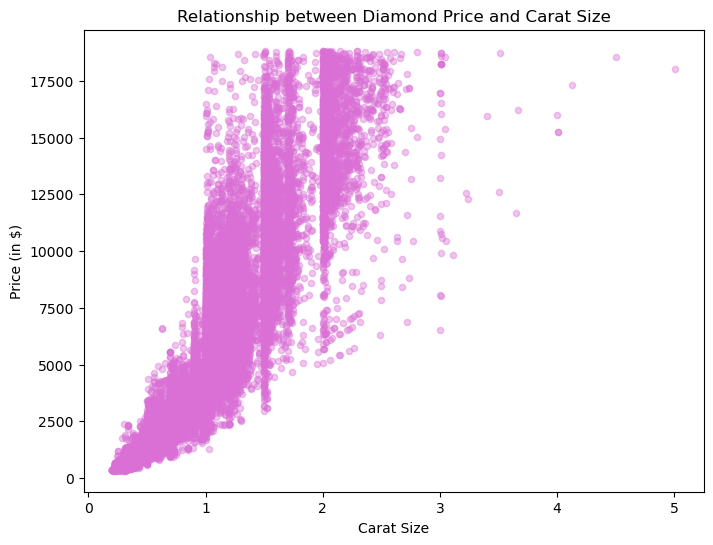

In [34]:
# Create a scatterplot of price against carat according to the following specifications:
# Set the figure size to [8,6].
plt.figure(figsize=[8,6])

# Set a point size of 20 and an alpha level of 0.4.
# Select a named single color for the points.
plt.scatter(x=diamonds.carat, y=diamonds.price, s=20, alpha=0.4, color='orchid')

# The x-axis should be labeled "Carat Size".
plt.xlabel('Carat Size')

# The y-axis should be labeled "Price (in $)".
plt.ylabel('Price (in $)')

# The figure should be title "Relationship between Diamond Price and Carat Size".
plt.title('Relationship between Diamond Price and Carat Size')

# Display the figure using plt.show().
plt.show()

### Price Against Carat Scatterplot, Colored by Clarity
Reproduce the plot from above, but will now color the points according to their clarity.

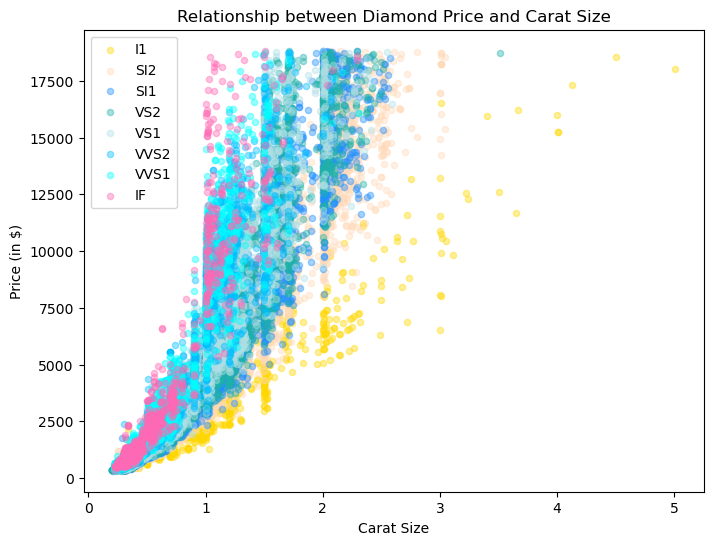

In [54]:
# Loop over the previously defined clarity_levels list and adding a new scatterplot to the figure for each item in
# clarity_levels. The colors of the points associated with each level of clarity should be set according to the clarity_pal list.
plt.figure(figsize=[8,6])
for i, clarity in enumerate(clarity_levels):
    sel = diamonds.clarity == clarity
    plt.scatter(x=diamonds.loc[sel,'carat'], y=diamonds.loc[sel, 'price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')

# Add a legend to the figure. 
plt.legend()

plt.show()

### Price Against Carat, Separated by Clarity
Separate the points for each of the eight clarity levels into its own subplot.

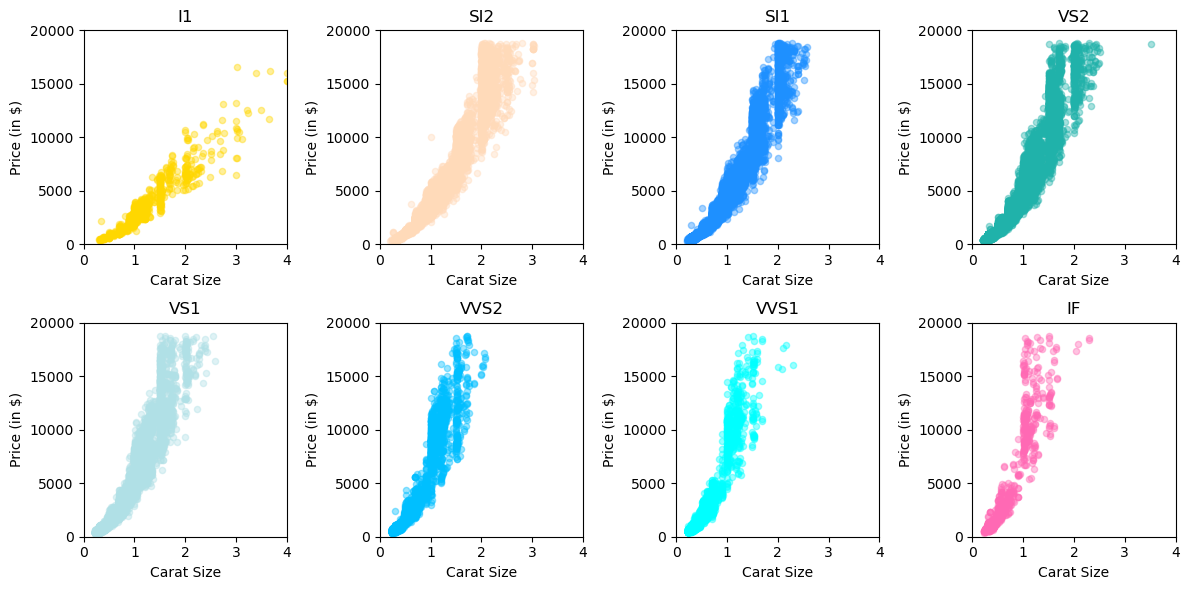

In [62]:
# Create a figure containing a 2x4 grid of subplots. 
# Set the figure size to [12,6].
plt.figure(figsize=[12,6])

# Each subplot should display a scatter plot for diamonds corresponding to exactly one of the levels of clarity. 
for i, clarity in enumerate(clarity_levels):
    plt.subplot(2,4,i+1)
    sel = diamonds.clarity == clarity
    # Set a point size of 20 and an alpha level of 0.4.
    # The points in each subplot have a fill color determined by the appropriate element of clarity_pal.
    plt.scatter(x=diamonds.loc[sel,'carat'], y=diamonds.loc[sel, 'price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)
    # Within each subplot, the x-axis should be labeled "Carat Size" and the y-axis should be labeled "Price (in $)".
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    # The title of each subplot should be equal to the level of clarity being represented by that subplot.
    plt.title(clarity)
    # The x-limits of each subplot should be set to [0,4] and the y-limits should be set to [0,20000].
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
    
# Call plt.tight_layout() and then display the figure using plt.show().
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
Starting by adding two new columns to the diamonds in order to store the transformed variables

In [61]:
# Add two new columns named ln_carat and ln_price to diamonds. The values stored in these columns should be the
# natural logarithms of the carat and price columns.
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.carat)
diamonds.loc[:, 'ln_price'] = np.log(diamonds.price)

Continue by using histograms to explore the distribution of the diamond prices, and the log of the diamond prices.

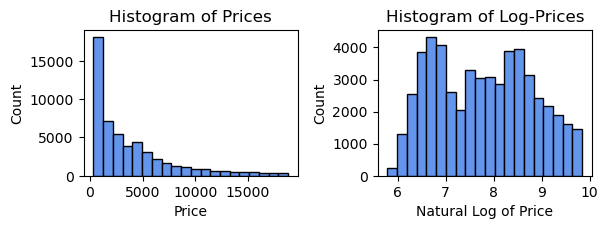

In [73]:
# Display two side-by-side histograms. The histogram on the left should be for price and the one on the right should be for ln_price. 
# Set the figure size to be [12,4].
plt.figure(figsize=[12,4])

plt.subplot(2,4,1)
# Label the x-axes as "Price"
plt.xlabel('Price')
# Label the y-axes as "Count".
plt.ylabel('Count')
# The plots should be titled "Histogram of Prices" 
plt.title('Histogram of Prices')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors.
plt.hist(diamonds.loc[:, 'price'], color='cornflowerblue', edgecolor='black', bins=20)

plt.subplot(2,4,2)
# and "Natural Log of Price". 
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
# and "Histogram of Log-Prices".
plt.title('Histogram of Log-Prices')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors.
plt.hist(diamonds.loc[:, 'ln_price'], color='cornflowerblue', edgecolor='black', bins=20)

# Display the figure using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()

Continue by using histograms to explore the distribution of the carat sizes, and the log of the carat sizes.

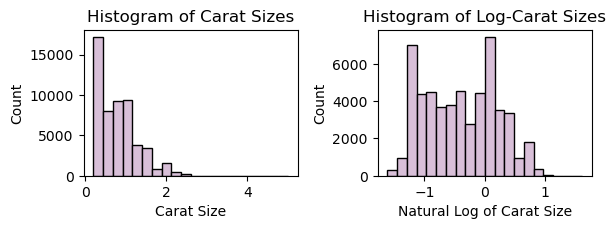

In [72]:
# Display two side-by-side histograms. The histogram on the left should be for carat and the one on the right should be
# for ln_carat. Create your figure according to the following specifications:
# • Set the figure size to be [12,4].
plt.figure(figsize=[12,4])

plt.subplot(2,4,1)
# Label the x-axes a "Carat Size"  
plt.xlabel('Carat Size')
# Label the y-axes as "Count".
plt.ylabel('Count')
# The plots should be titled "Histogram of Carat Sizes"
plt.title('Histogram of Carat Sizes')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors, different from the one used in the previous plot.
plt.hist(diamonds.loc[:, 'carat'], color='thistle', edgecolor='black', bins=20)

plt.subplot(2,4,2)
# and "Natural Log of Carat Size".
plt.xlabel('Natural Log of Carat Size')
# Label the y-axes as "Count".
plt.ylabel('Count')
# and "Histogram of Log-Carat Sizes"
plt.title('Histogram of Log-Carat Sizes')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors, different from the one used in the previous plot.
plt.hist(diamonds.loc[:, 'ln_carat'], color='thistle', edgecolor='black', bins=20)

# Display the figure using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()